In [2]:
import sys
import sklearn
import matplotlib
import numpy as np


In [3]:
from keras.datasets import mnist

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print('Training Data: {}'.format(x_train.shape))
print('Training Labels: {}'.format(y_train.shape))

Training Data: (60000, 28, 28)
Training Labels: (60000,)


In [5]:
print('Testing Data: {}'.format(x_test.shape))
print('Testing Labels: {}'.format(y_test.shape))

Testing Data: (10000, 28, 28)
Testing Labels: (10000,)


In [6]:
import matplotlib.pyplot as plt

In [7]:
%matplotlib inline

<ipython-input-8-bf83d3fb3ee5>:7: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


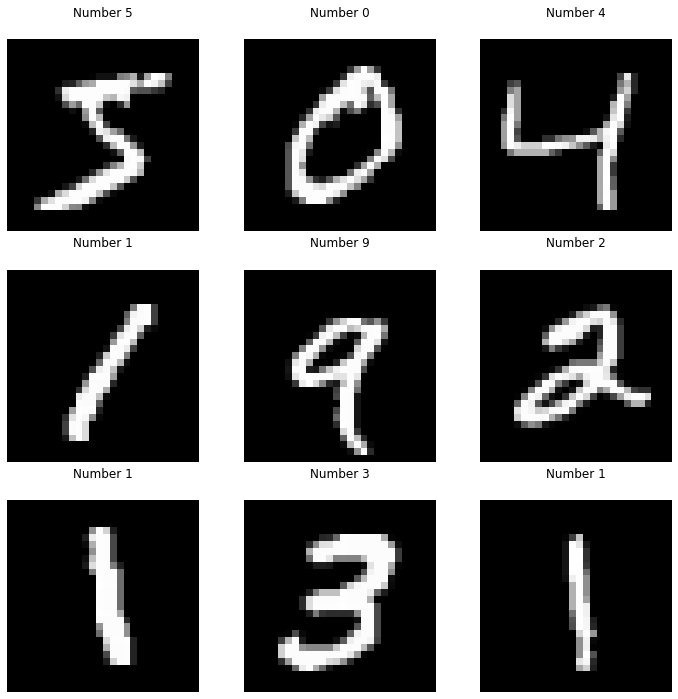

In [8]:
fig, axs = plt.subplots(3, 3, figsize = (12, 12))
plt.gray()
for i, ax in enumerate(axs.flat):
    ax.matshow(x_train[i])
    ax.axis('off')
    ax.set_title('Number {}'.format(y_train[i]))
fig.show()

In [9]:
X = x_train.reshape(len(x_train),-1)
Y = y_train

In [10]:
X = X.astype(float) / 255.
print(X.shape)
print(X[0].shape)

(60000, 784)
(784,)


In [11]:
from sklearn.cluster import MiniBatchKMeans
n_digits = len(np.unique(y_test))
print(n_digits)

10


In [12]:
kmeans = MiniBatchKMeans(n_clusters = n_digits)
kmeans.fit(X)

MiniBatchKMeans(n_clusters=10)

In [13]:
kmeans.labels_

array([5, 4, 9, ..., 1, 6, 7], dtype=int32)

In [14]:
def infer_cluster_labels(kmeans, actual_labels):
    inferred_labels = {}

    for i in range(kmeans.n_clusters):
        labels = []
        index = np.where(kmeans.labels_ == i)
        labels.append(actual_labels[index])
        if len(labels[0]) == 1:
            counts = np.bincount(labels[0])
        else:
            counts = np.bincount(np.squeeze(labels))
        if np.argmax(counts) in inferred_labels:
            inferred_labels[np.argmax(counts)].append(i)
        else:
            inferred_labels[np.argmax(counts)] = [i]

        
    return inferred_labels  

def infer_data_labels(X_labels, cluster_labels):

    predicted_labels = np.zeros(len(X_labels)).astype(np.uint8)
    
    for i, cluster in enumerate(X_labels):
        for key, value in cluster_labels.items():
            if cluster in value:
                predicted_labels[i] = key
                
    return predicted_labels

In [15]:
cluster_labels = infer_cluster_labels(kmeans, Y)
X_clusters = kmeans.predict(X)
predicted_labels = infer_data_labels(X_clusters, cluster_labels)
print(predicted_labels[:20])
print(Y[:20])

[8 0 4 1 7 6 1 8 1 7 8 1 3 6 1 7 2 8 6 7]
[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9]


In [16]:
from sklearn import metrics

def calculate_metrics(estimator, data, labels):
    print('Number of Clusters: {}'.format(estimator.n_clusters))
    print('Inertia: {}'.format(estimator.inertia_))
    print('Homogeneity: {}'.format(metrics.homogeneity_score(labels, estimator.labels_)))

In [17]:
clusters = [10, 16, 36, 64, 144, 256]

In [18]:
for n_clusters in clusters:
    estimator = MiniBatchKMeans(n_clusters = n_clusters)
    estimator.fit(X)
    
    calculate_metrics(estimator, X, Y)
    cluster_labels = infer_cluster_labels(estimator, Y)
    predicted_Y = infer_data_labels(estimator.labels_, cluster_labels)
    print('Accuracy: {}\n'.format(metrics.accuracy_score(Y, predicted_Y)))

Number of Clusters: 10
Inertia: 2376276.13113578
Homogeneity: 0.44841574823046143
Accuracy: 0.5175666666666666

Number of Clusters: 16
Inertia: 2215682.8440856636
Homogeneity: 0.5623562317472343
Accuracy: 0.6516

Number of Clusters: 36
Inertia: 1965498.6489436605
Homogeneity: 0.6889850898043962
Accuracy: 0.7814333333333333

Number of Clusters: 64
Inertia: 1812636.9421208967
Homogeneity: 0.7338513343099089
Accuracy: 0.797

Number of Clusters: 144
Inertia: 1632898.7416017572
Homogeneity: 0.8053956918636721
Accuracy: 0.8734833333333333

Number of Clusters: 256
Inertia: 1514992.3358194246
Homogeneity: 0.8391101845385038
Accuracy: 0.89425



In [19]:
kmeans = MiniBatchKMeans(n_clusters = 36)
kmeans.fit(X)

MiniBatchKMeans(n_clusters=36)

<ipython-input-20-c8eabcadaf4c>:14: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


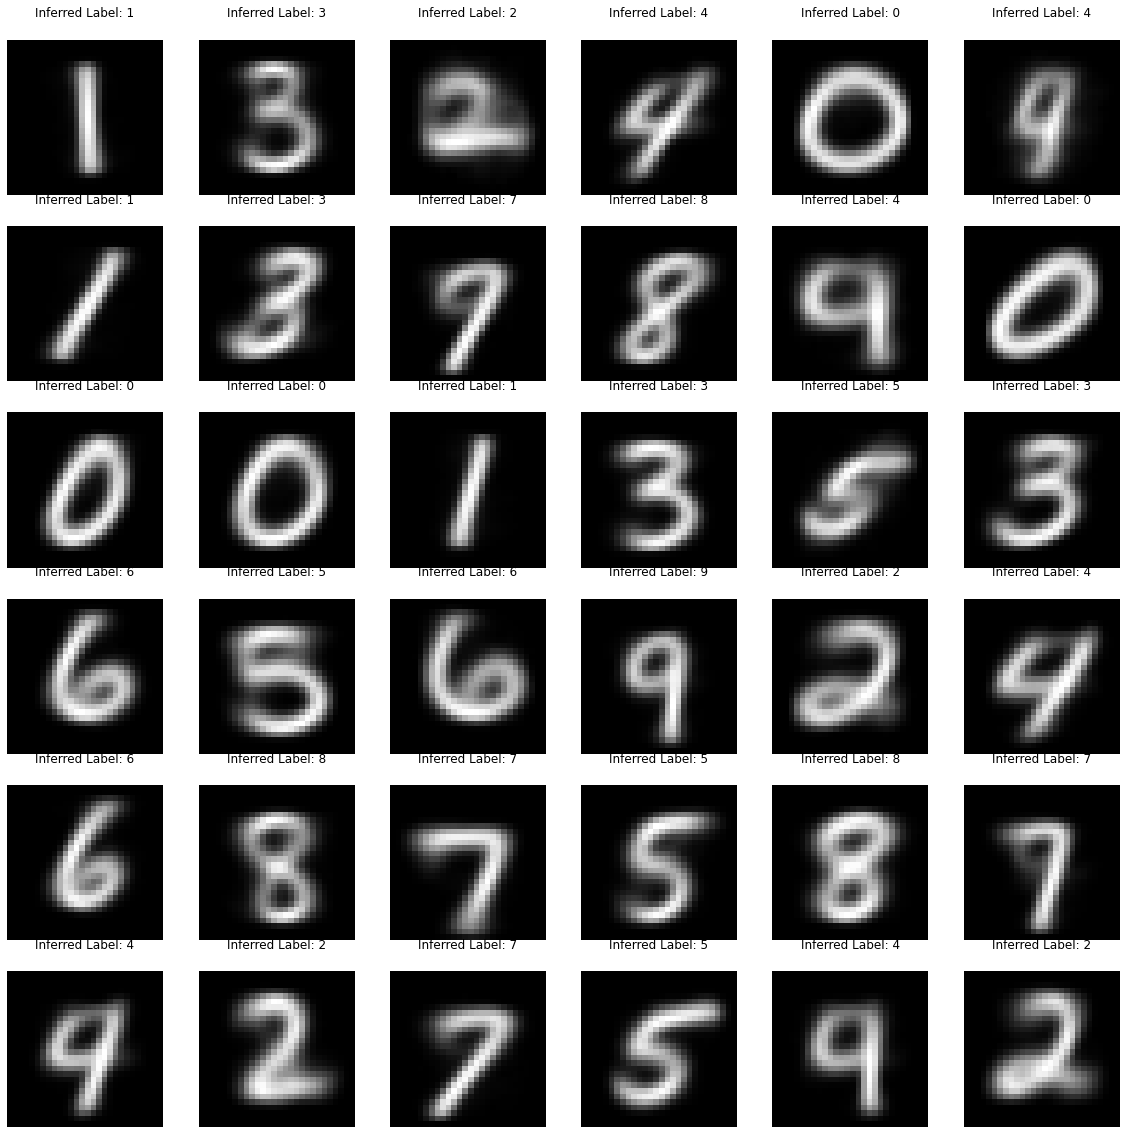

In [20]:
centroids = kmeans.cluster_centers_
images = centroids.reshape(36, 28, 28)
images *= 255
images = images.astype(np.uint8)
cluster_labels = infer_cluster_labels(kmeans, Y)
fig, axs = plt.subplots(6, 6, figsize = (20, 20))
plt.gray()
for i, ax in enumerate(axs.flat):
    for key, value in cluster_labels.items():
        if i in value:
            ax.set_title('Inferred Label: {}'.format(key))
    ax.matshow(images[i])
    ax.axis('off')
fig.show()

In [21]:
X_test = x_test.reshape(len(x_test),-1)


X_test = X_test.astype(float) / 255.

kmeans = MiniBatchKMeans(n_clusters = 256)
kmeans.fit(X)
cluster_labels = infer_cluster_labels(kmeans, Y)

test_clusters = kmeans.predict(X_test)
predicted_labels = infer_data_labels(kmeans.predict(X_test), cluster_labels)
    
print('Accuracy: {}\n'.format(metrics.accuracy_score(y_test, predicted_labels)))

Accuracy: 0.9005

